#### Assignment 2<br>Jericho McLeod<br>CSS-692

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import csv

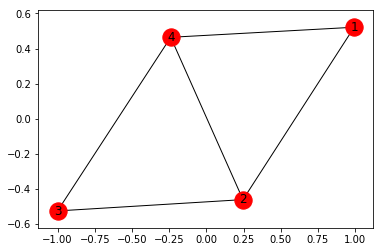

In [3]:
# Creating a sample graph to check functions
G=nx.Graph()
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_edge(1,2)
G.add_edge(1,4)
G.add_edge(2,4)
G.add_edge(2,3)
G.add_edge(3,4)
#G.add_edge(3,5)
#G.add_edge(1,6)
nx.draw_networkx(G)

<b>Task 1:</b>
Create a function that takes as input a network of networkx type Graph() and a node i and returns the number of v-shapes visiting node i. You are free to use the degree method.

In [4]:
def count_v_i(G,i):
    k_i = G.degree(i)
    if k_i<2:
        return(0)
    else:
        return(int((k_i * (k_i-1))/2))

count_v_i(G,1)
count_v_i(G,2)

3

<b>Task 2:</b> Create a function that takes as input a network of networkx type Graph() and a node i and returns the number of triangles visiting node i. You are free to use the degree and neighbors methods.

In [5]:
def count_t_i(G,node):
    triangles = 0
    n = list(G.neighbors(node))
    for i in range(len(n)):
        for j in range(len(n)):
            if j>i:
                triangles += G.has_edge(n[i],n[j])
    return(int(triangles))
                
count_t_i(G,2)

2

<b>Task 3:</b> Create a function that takes as input a network of networkx type Graph() and a node i and returns the local clustering of i.

In [6]:
def local_cluster(G,i):
    vs = count_v_i(G,i)
    t  = count_t_i(G,i)
    if vs>0:
        return(t/vs)
    else: return(0)

local_cluster(G,2)

0.6666666666666666

<b>Task 4:</b> Copy the function from the lecture notes that generates WS networks (note that what I have provided is the r = 0 case, i.e. no disorder, which we use in this problem). Create a network of n = 100 and k = 8

In [9]:
def build_WS(n,k,r):
    hk = int(k/2)
    G  = nx.Graph()
    for i in range(0,n):
        for x in range(1,hk+1):
            j = i + x
            if j >= n:
                j -= n
            G.add_edge(i,j)
    
    
    
    # The rest of this is to introduce random rewiring
    # Pass r=0 to function to skip
    if r > 0:
        
        # Iterate through the nodes in the graph and get their neighbors
        v_g = G.nodes()
        for i in v_g:
            ne =  list(G.neighbors(i))
            
            # iterate through the neighbors and, for each, check a random number
            # against the propability of rewiring
            for j in ne:
                if r > random.random():
                    
                    # Set an escape parameter to limit search for possible rewiring,
                    # then utilize it in rewiring search loop
                    
                    '''
                    Question: should a specific limit be used?
                    If so, is there a tip  for optimizing?
                    Otherwise, what limiting condition is applicable?'''
                    
                    attempts= 10
                    while attempts > 0:
                        
                        # Find a new random node that is not a default neighbor of i
                        # and select one of its neighbors randomly
                        h = random.randint(0,n-k)
                        if h > i+hk:
                            h+=hk
                        h_ne = list(G.neighbors(h))
                        f = h_ne[random.randint(0,len(h_ne)-1)]
                        
                        # Check for overlapping links and them rewire if possible
                        # When rewiring, 0 the escape parameter to exit loop
                        if G.has_edge(i,h) == 0 \
                                and G.has_edge(j,f) ==0 \
                                # the follow 2 lines shouldn't be needed
                                # but networkx had a glitch in finding real neighbors 
                                and G.has_edge(i,j)==1 \
                                and G.has_edge(f,h)==1:
                            try:
                                G.add_edge(i,h)
                                G.add_edge(j,f)
                                G.remove_edge(i,j)
                                G.remove_edge(f,h)
                                attemps = 0
                            except:
                                pass
                            
                        # Otherwise, decrement escape parameter
                        attempts-=1
    return(G)

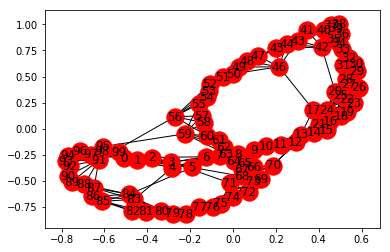

In [8]:
test_WS = build_WS(100,8,.008)
nx.draw_networkx(test_WS)

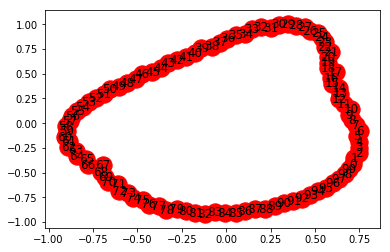

In [11]:
WS = build_WS(100,8,0)
nx.draw_networkx(WS)

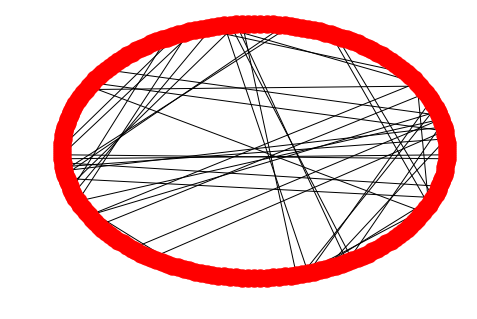

In [44]:
WS = build_WS(200,8,0.02)
nx.draw_circular(WS)

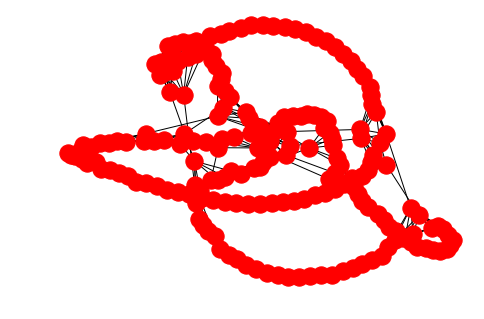

In [51]:
WS = build_WS(200,8,0.005)
nx.draw_spring(WS)

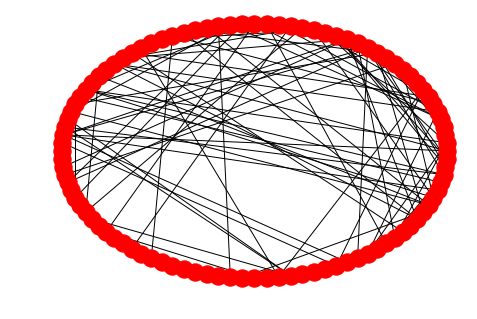

In [60]:
WS = build_WS(100,8,0.05)
nx.draw_shell(WS)

<b>Create:</b><br>
<b>Task 4(a):</b> a list VslistWS of all the local v-shape counts for each and every node in the network,<br>
<b>Task 4(b)</b> a list TrilistWS of all the local triangle counts for each and every node in the network,<br>
<b>Task 4(c)</b> a list clistWS of all the clustering coefficients for each and every node in the network,


In [12]:
def G_lists(G):
    VslistWS  = []
    TrilistWS = []
    clistWS = []
    for i in list(G.nodes()):
        VslistWS.append(count_v_i(G,i))
        TrilistWS.append(count_t_i(G,i))
        clistWS.append(local_cluster(G,i))
    return(VslistWS,TrilistWS,clistWS)

VslistWS,TrilistWS,clistWS  = G_lists(WS)

print(VslistWS,'\n')
print(TrilistWS,'\n')
print(clistWS,'\n')



# Uncomment to see test network with random rewiring
'''VslistWS,TrilistWS,clistWS  = G_lists(test_WS)

print(VslistWS,'\n')
print(TrilistWS,'\n')
print(clistWS)'''

[28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28] 

[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18] 

[0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.6428571428571429, 0.64285714285

"VslistWS,TrilistWS,clistWS  = G_lists(test_WS)\n\nprint(VslistWS,'\n')\nprint(TrilistWS,'\n')\nprint(clistWS)"

<b>Task 4(d)</b> using only a python dictionary and not the histogram function above, create a histogram of the values in VslistWS and describe what you find<br>
<b>Task 4(e)</b> using only a python dictionary and not the histogram function above, create a histogram of the values in TrilistWS and describe what you find<br>
<b>Task 4(f)</b> using the histogram function above, create a histogram of the values in clistWS and describe what you find.

In [13]:
def hist_dict(ls,q):
    out = {}
    mn  = min(ls)
    mx  = max(ls)
    r   = mx-mn
    if r>0:
        bin_width = r/q
        for i in range(q):
            string = str(round(bin_width*i+mn,3))+' to <'+str(round(bin_width*(i+1)+mn,3))
            out[string] =0
        for i in ls:
            hist_bin =  mn+((i-mn)//bin_width)*bin_width
            string = str(round(hist_bin,3))+' to <'+str(round(hist_bin+bin_width,3))
            out[string] = out.get(string,0)+1
    else:
        out[str(ls[0])]=len(ls)
    for k,v in out.items():
        out[k]  = v/ sum(list(out.values()))
    return(out)


VsdictWS  = hist_dict(VslistWS,10)
TridictWS = hist_dict(TrilistWS,10)
cdictWS   = hist_dict(clistWS,10)
print(VsdictWS)
print(TridictWS)
print(cdictWS)

{'28': 1.0}
{'18': 1.0}
{'0.6428571428571429': 1.0}


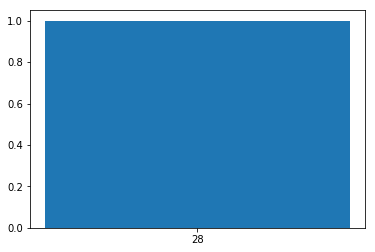

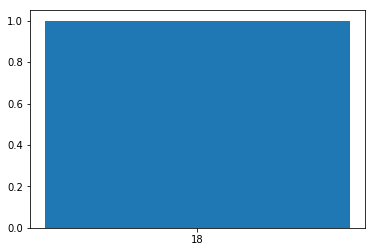

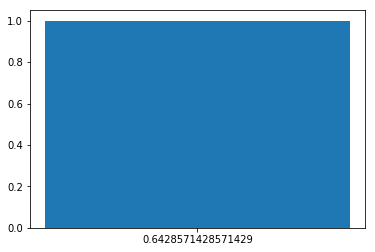

In [14]:
for i in [VsdictWS,TridictWS,cdictWS]:
    plt.bar(list(i.keys()),list(i.values()))
    plt.show()

All values (P=1) are 28 in Vs, 18 in Tris, and 0.64 in clustering, which is expected given the input WS graph.<br><br>
<b>Task 4(g)</b> Construct three scatter plots, each one pairing two out of the three quantities ki, ti, ci.

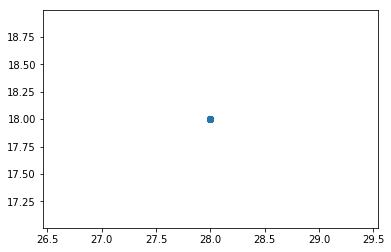

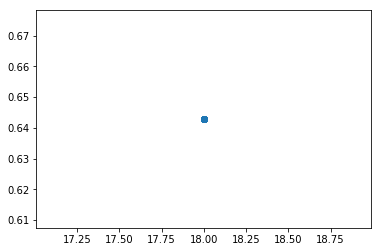

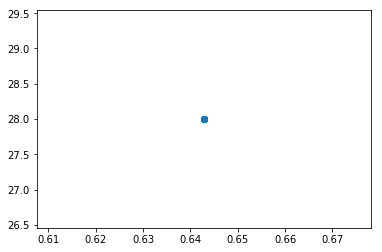

In [15]:
plt.plot(VslistWS,TrilistWS,'o')
plt.show()
plt.plot(TrilistWS,clistWS,'o')
plt.show()
plt.plot(clistWS,VslistWS,'o')

<b>Task 5:</b> Now, increase k in Prob. 4 in increments of 2 until k = 2⌊(n − 1)/2⌋. Plot as a function of k:<br>
(a) the count of v-shapes for a node,<br>
(b) the count of triangles for a node, and<br>
(c) value of the local clustering of a node.<br>
What is the value of kc? Can you spot it in the plots?

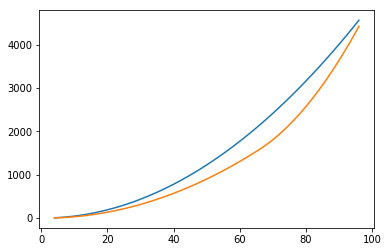

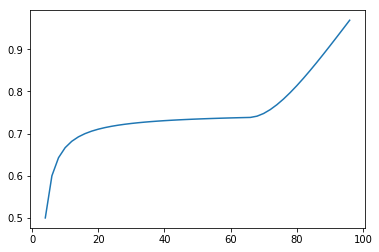

In [16]:
n = 100
r = 0

k_list    = []
VslistWS  = []
TrilistWS = []
clistWS   = []

k_max = 2*int((n-1)/2)

for i in range(2,int(k_max/2)):
    k = i*2
    G = build_WS(n,k,r)
    k_list.append(k)
    VslistWS.append(count_v_i(G,1))
    TrilistWS.append(count_t_i(G,1))
    clistWS.append(local_cluster(G,1))

plt.plot(k_list,VslistWS)
plt.plot(k_list,TrilistWS)
plt.show()
plt.plot(k_list,clistWS)
plt.show()

$k_c$ is around 70.<br><br>
<b>Task 6:</b> download  data
<br><br>
<b>Task 7:</b> Repeat Prob. 4 for both E and C, however do not worry about describing your findings in words. Instead, plot all histograms using:<br>
(a) linear scales for both horizontal and vertical axes (hint: you don’t need to the plt.xscale(’log’) statement),<br>
(b) logarithmic scales for both horizontal and vertical axes,<br>
The outcomes of these plots can be compared with the lecture notes for accuracy.

In [17]:
def graph_from_data(data_file,skip_row):
    data = []
    G = nx.Graph()
    with open(data_file, newline='\n') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
             data.append(row)
    for itera in range(skip_row,len(data)):
        i = int(data[itera][0])
        j = int(data[itera][1])
        G.add_edge(i,j)
    return(G)

E = graph_from_data('email-Enron.txt',4)
C = graph_from_data('ca-CondMat-noself.txt',4)

<b>Create:</b><br>
<b>Task 7(a):</b> a list VslistWS of all the local v-shape counts for each and every node in the network,<br>
<b>Task 7(b)</b> a list TrilistWS of all the local triangle counts for each and every node in the network,<br>
<b>Task 7(c)</b> a list clistWS of all the clustering coefficients for each and every node in the network,<br>
<b>Task 7(d)</b> using only a python dictionary and not the histogram function above, create a histogram of the values in VslistWS and describe what you find<br>
<b>Task 7(e)</b> using only a python dictionary and not the histogram function above, create a histogram of the values in TrilistWS and describe what you find<br>
<b>Task 7(f)</b> using the histogram function above, create a histogram of the values in clistWS and describe what you find.<br>
<b>Task 7(g)</b> Construct three scatter plots, each one pairing two out of the three quantities ki, ti, ci.

In [18]:
# Creating lists for 4(a), 4(b), and 4(c)
C_VslistWS,C_TrilistWS,C_clistWS  = G_lists(C)
E_VslistWS,E_TrilistWS,E_clistWS  = G_lists(E)

In [19]:
# Creating dicts for 4(d), 4(e), and 4(f)
C_VsdictWS  = hist_dict(C_VslistWS,20)
C_TridictWS = hist_dict(C_TrilistWS,20)
C_cdictWS   = hist_dict(C_clistWS,20)

E_VsdictWS  = hist_dict(E_VslistWS,20)
E_TridictWS = hist_dict(E_TrilistWS,20)
E_cdictWS   = hist_dict(E_clistWS,20)

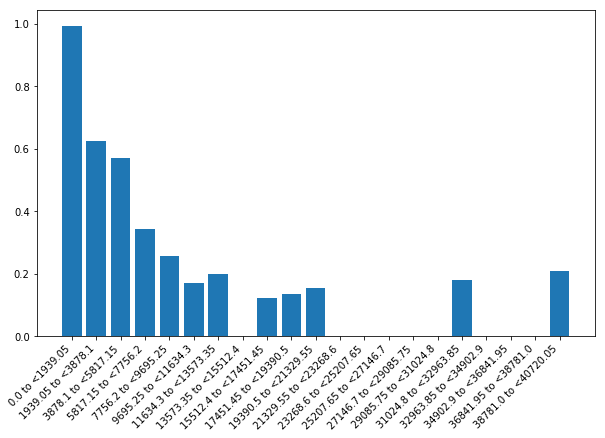

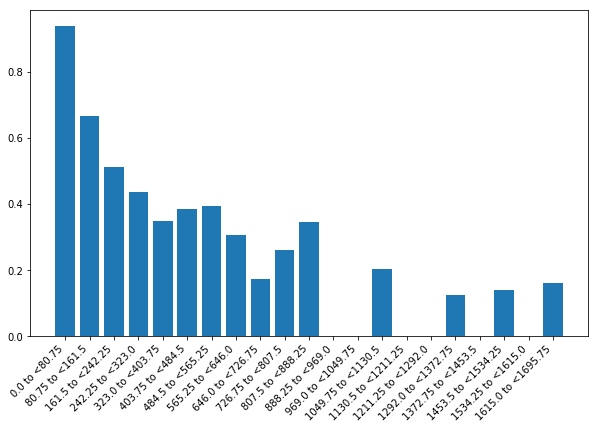

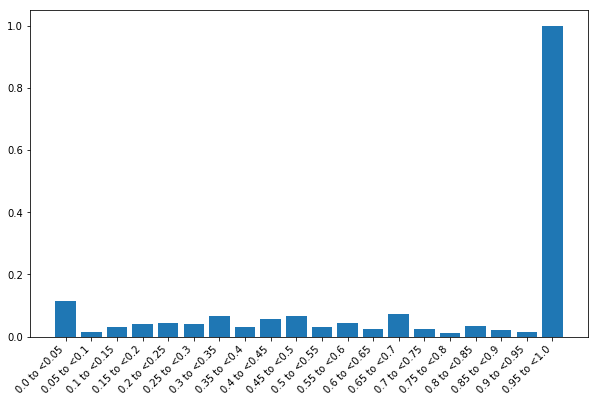

In [20]:
for i in [C_VsdictWS,C_TridictWS,C_cdictWS]:
    plt.figure(figsize=(10,6))
    plt.bar(list(i.keys()),list(i.values()))
    plt.xticks(rotation=45,ha='right')
    plt.show()

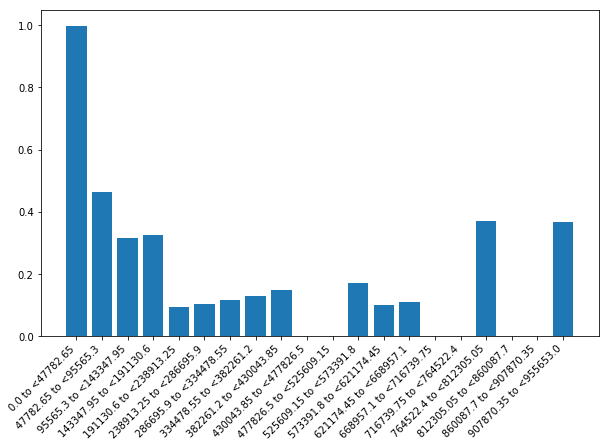

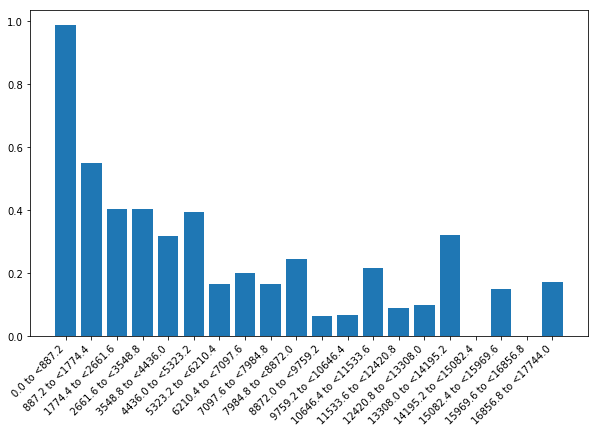

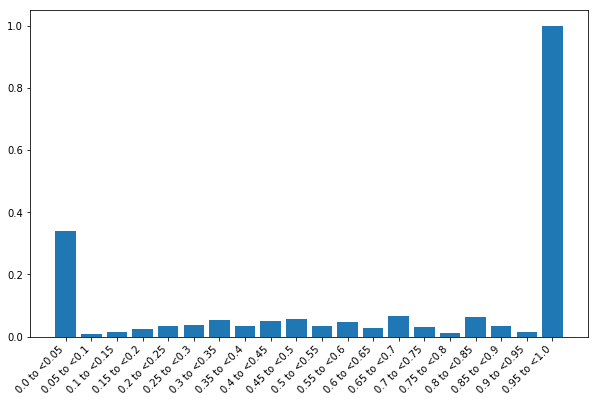

In [21]:
for i in [E_VsdictWS,E_TridictWS,E_cdictWS]:
    plt.figure(figsize=(10,6))
    plt.bar(list(i.keys()),list(i.values()))
    plt.xticks(rotation=45,ha='right')
    plt.show()

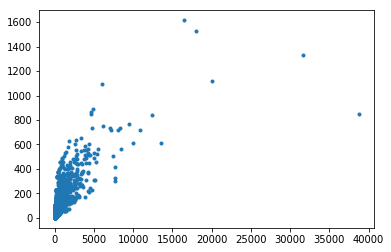

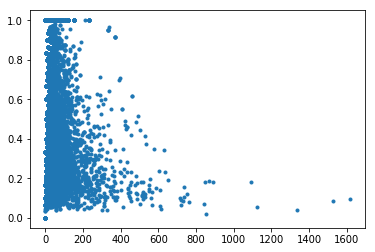

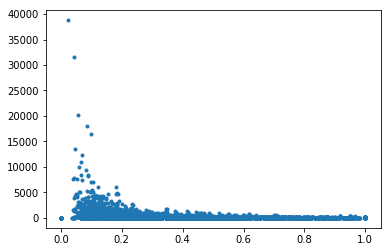

In [22]:
# Scatterplots for 4(g) with linear and log scales
plt.plot(C_VslistWS,C_TrilistWS,'.')
plt.show()
plt.plot(C_TrilistWS,C_clistWS,'.')
plt.show()
plt.plot(C_clistWS,C_VslistWS,'.')
plt.show()

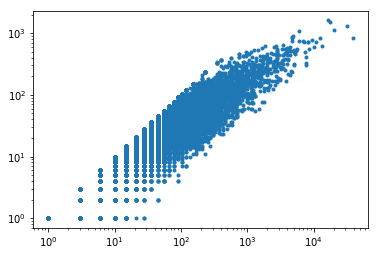

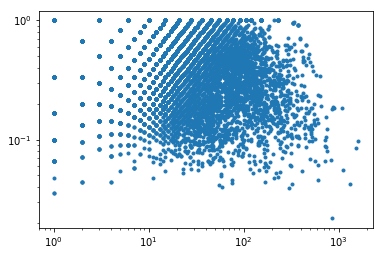

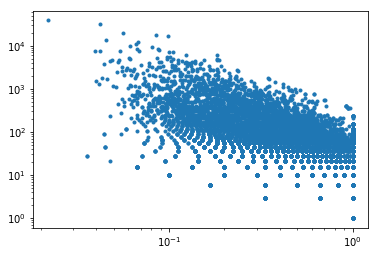

In [23]:
plt.plot(C_VslistWS,C_TrilistWS,'.')
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.plot(C_TrilistWS,C_clistWS,'.')
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.plot(C_clistWS,C_VslistWS,'.')
plt.xscale('log')
plt.yscale('log')
plt.show()

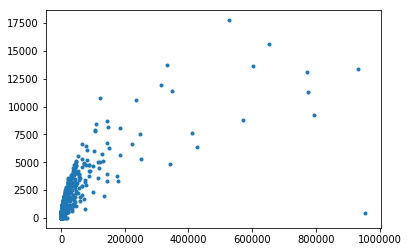

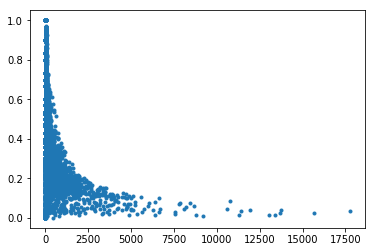

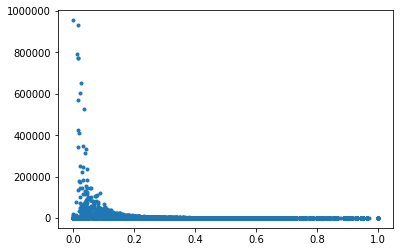

In [24]:
plt.plot(E_VslistWS,E_TrilistWS,'.')
plt.show()
plt.plot(E_TrilistWS,E_clistWS,'.')
plt.show()
plt.plot(E_clistWS,E_VslistWS,'.')
plt.show()

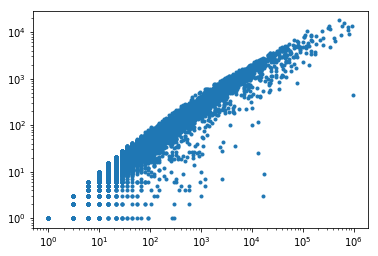

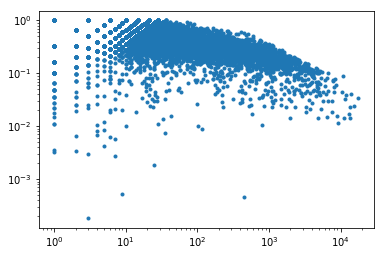

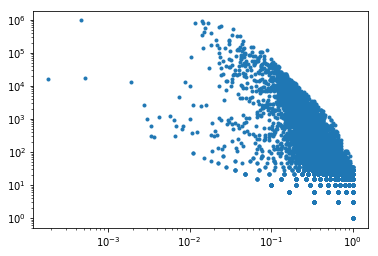

In [25]:
plt.plot(E_VslistWS,E_TrilistWS,'.')
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.plot(E_TrilistWS,E_clistWS,'.')
plt.xscale('log')
plt.yscale('log')
plt.show()

plt.plot(E_clistWS,E_VslistWS,'.')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [26]:
E.order()

36692